In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
a1 = []
a1.append([0,0,0,0,1])
a1.append([0,0,0,1,0]) 
a1.append([5**4,5**3,5**2,5,1])
a1.append([4*(5**3),3*(5**2),2*5,1,0])
a1.append([2**4,2**3,2**2,2,1])
# a1.append([4*(2**3),3*(2**2),2*2,1,0])
v_m = 0
v_f = 0 
print (a1)
b1 = [3,0,9,v_f,1]
print (b1)
a1 = np.array(a1)
b1 = np.array(b1)
x = np.dot(np.linalg.pinv(a1),b1.T)
x = np.array(x)
x = np.expand_dims(x, axis=0)
print (x)


[[0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [625, 125, 25, 5, 1], [500, 75, 10, 1, 0], [16, 8, 4, 2, 1]]
[3, 0, 9, 0, 1]
[[-1.14222222e-01  1.04622222e+00 -2.13555556e+00  1.00256886e-15
   3.00000000e+00]]


In [3]:
a2 = []
a2.append([0,0,0,0,1])
a2.append([0,0,0,1,0]) 
a2.append([5**4,5**3,5**2,5,1])
a2.append([4*(5**3),3*(5**2),2*5,1,0])
a2.append([2**4,2**3,2**2,2,1])
# a2.append([4*(2**3),3*(2**2),2*2,1,0])
print (a2)
b2 = [0,0,5,0,2.5]
a2 = np.array(a2)
b2 = np.array(b2)
y = np.dot(np.linalg.pinv(a2),b2.T)
y = np.expand_dims(y, axis=0)
print (y)
points1 = [3,1,9]
points2 = [0,2.5,5]

[[0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [625, 125, 25, 5, 1], [500, 75, 10, 1, 0], [16, 8, 4, 2, 1]]
[[ 2.05555556e-02 -2.85555556e-01  1.11388889e+00  6.41560003e-16
   6.15070027e-16]]


In [4]:
figure = plt.figure(figsize = (10,10))
t = np.linspace(0,5,50)
print (t.shape)
tbig = np.vstack((t**4,t**3,t**2,t,np.ones(50)))
xc = x @ tbig
yc = y @ tbig
print(tbig.shape)


(50,)
(5, 50)


<Figure size 720x720 with 0 Axes>

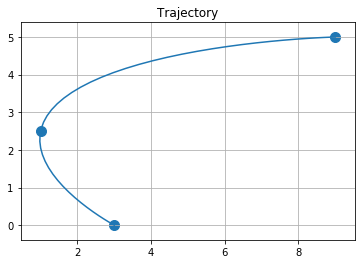

In [5]:
plt.plot(xc.T,yc.T)
plt.title('Trajectory')
plt.scatter(points1,points2,s=100)
plt.grid()
plt.show()

(50,)
(5, 50)


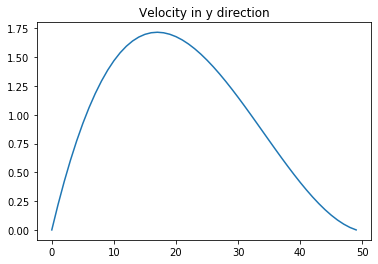

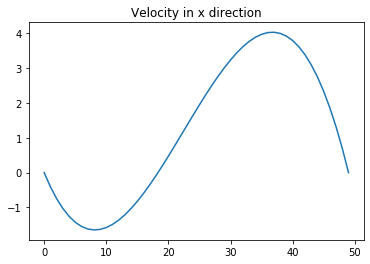

In [6]:
t = np.linspace(0,5,50)
print (t.shape)
tbig_diff = np.vstack((4*(t**3),3*(t**2),2*t,np.ones(50),np.zeros(50)))
print(tbig_diff.shape)
xc_diff = x @ tbig_diff
yc_diff = y @ tbig_diff
plt.plot(yc_diff.T)
plt.title('Velocity in y direction')

plt.show()
plt.plot(xc_diff.T)
plt.title('Velocity in x direction')
plt.show()

(50,)
(5, 50)


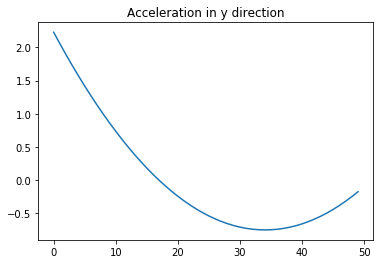

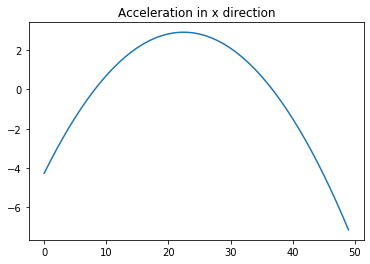

In [7]:
t = np.linspace(0,5,50)
print (t.shape)
tbig_diff = np.vstack((12*(t**2),6*t,2*np.ones(50),np.zeros(50),np.zeros(50)))
print(tbig_diff.shape)
xc_diff = x @ tbig_diff
yc_diff = y @ tbig_diff
plt.plot(yc_diff.T)
plt.title('Acceleration in y direction')

plt.show()
plt.plot(xc_diff.T)
plt.title('Acceleration in x direction')
plt.show()

[[1, 0, 0, 0, 0, 0], [-1, 1, 0, 0, 0, 0], [0.07775999999999998, 0.2592, 0.3456, 0.23040000000000005, 0.07680000000000002, 0.010240000000000003], [-0.1296, -0.21599999999999997, 0.0, 0.19200000000000003, 0.12800000000000003, 0.025600000000000005], [0, 0, 0, 0, 0, 1], [0, 0, 0, 0, -1, 1]]


<Figure size 720x720 with 0 Axes>

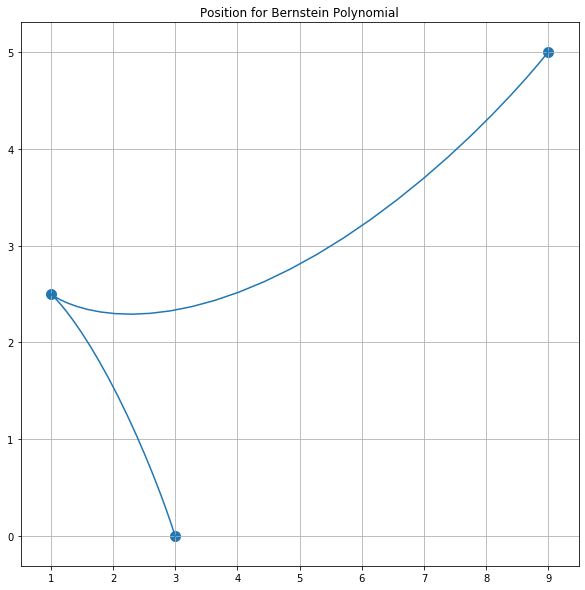

In [8]:
#Bernstein polynomial
import copy
figure = plt.figure(figsize = (10,10))
w = []

tau = 0
w.append([(1-tau)**5,5*tau*((1-tau)**4),10*((tau)**2)*(1-tau)**3,10*(tau)**3*(1-tau)**2,5*(tau)**4*(1-tau),tau**5])
w.append([-1*(1-tau)**4,(1-tau)**3*(1-5*tau),2*tau*(1-tau)**2*(2-5*tau),2*tau**2*(1-tau)*(3-5*tau),(tau**3)*(4-5*tau),tau**4])

tau = 2/5
w.append([(1-tau)**5,5*tau*((1-tau)**4),10*((tau)**2)*(1-tau)**3,10*(tau)**3*(1-tau)**2,5*(tau)**4*(1-tau),tau**5])
w.append([-1*(1-tau)**4,(1-tau)**3*(1-5*tau),2*tau*(1-tau)**2*(2-5*tau),2*tau**2*(1-tau)*(3-5*tau),(tau**3)*(4-5*tau),tau**4])

v_m = 0
v_f = 0

tau = 1
w.append([(1-tau)**5,5*tau*((1-tau)**4),10*((tau)**2)*(1-tau)**3,10*(tau)**3*(1-tau)**2,5*(tau)**4*(1-tau),tau**5])
w.append([-1*(1-tau)**4,(1-tau)**3*(1-5*tau),2*tau*(1-tau)**2*(2-5*tau),2*tau**2*(1-tau)*(3-5*tau),(tau**3)*(4-5*tau),tau**4])
b = [3,0,1,v_m,9,v_f]
print(w)
w = np.array(w)
b1 = np.array(b)
w2 = copy.deepcopy(w)
b2 = [0,0,2.5,v_m,5,v_f]
b2 = np.array(b2)

y1 = np.dot(np.linalg.pinv(w),b1.T)
y1 = np.expand_dims(y1, axis=0)
y2 = np.dot(np.linalg.pinv(w2),b2.T)
y2 = np.expand_dims(y2, axis=0)
points1 = [3,1,9]
points2 = [0,2.5,5]
figure = plt.figure(figsize = (10,10))
t = np.linspace(0,5,50)
tbig = np.vstack(((1-(t/5))**5,t*(1-(t/5))**4,10*((t/5)**2)*(1-(t/5))**3,10*((t/5)**3)*(1-(t/5))**2,((t/5)**4)*(5-t),(t/5)**5))
yc = y1 @ tbig
yc1 = y2 @ tbig
plt.plot(yc.T,yc1.T)
plt.scatter(points1,points2,s=100)
plt.grid()
plt.title('Position for Bernstein Polynomial')
plt.show()

(50,)
(6, 50)


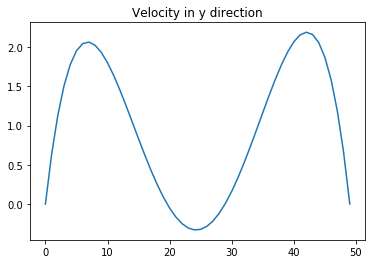

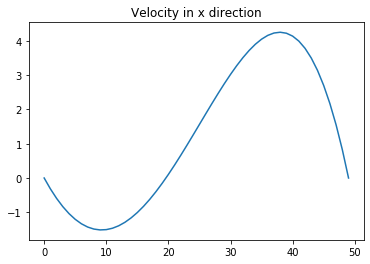

In [9]:
#for velocity
t = np.linspace(0,5,50)
print (t.shape)
tbig_diff_2 = np.vstack((-1*(1-t/5)**4,(1-t/5)**3*(1-t),2*t/5*(1-t/5)**2*(2-t),2*(t/5)**2*(1-t/5)*(3-t),(t/5)**3*(4-t),(t/5)**4))
print(tbig_diff_2.shape)
xc_diff_2 = y1 @ tbig_diff_2
yc_diff_2 = y2 @ tbig_diff_2
plt.plot(yc_diff_2.T)
plt.title('Velocity in y direction')

plt.show()
plt.plot(xc_diff_2.T)
plt.title('Velocity in x direction')
plt.show()

(50,)


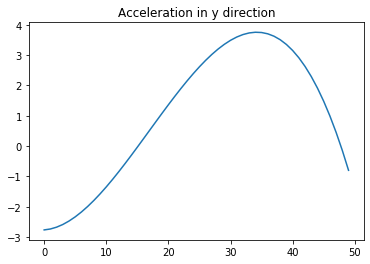

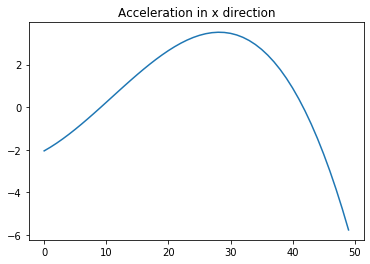

In [10]:
#for acceleration
t = np.linspace(0,5,50)
print (t.shape)
# tbig_diff_3 = np.vstack((4/5*(1-t/5)**3,-3/5*(1-(t/5)**2)*(1-t)-(1-t/5)**3,2/5*((1-t/5)**2*(2-2*t)-2*(2*t/5-5*(t/5)**2)*(1-t/5)),2/5*t/5*(20*(t/5)**2-24*(t/5)+6),12/5*(t/5)**2-4*(t/5)**3,4*(t/5)**3))
tbig_diff_3 = np.vstack((4/5*(1-t/5)**3,-3/5*(1-(t/5)**2)*(1-t)-(1-t/5)**3,-2/5*((1-t/5)*(4*t/5-2*t**2/5)+(1-t/5)**2*(4/5-4*t/5)),-1/5*((6*t**2-2*t**2)/25)+(1-t/5)*(12*t/25-6*t/25),(12*t**2 - 4*t**3)/125,(4*(t)**3)/625))

# print(tbig_diff_2.shape)
xc_diff_3 = y1 @ tbig_diff_3
yc_diff_3 = y2 @ tbig_diff_3
plt.plot(yc_diff_3.T)
plt.title('Acceleration in y direction')

plt.show()
plt.plot(xc_diff_3.T)
plt.title('Acceleration in x direction')
plt.show()

In [11]:
#Bonus
#done using quartic polynomial, adding more constraints
a1 = []
a1.append([0,0,0,0,1])
a1.append([0,0,0,1,0]) 
a1.append([5**4,5**3,5**2,5,1])
a1.append([4*(5**3),3*(5**2),2*5,1,0])
a1.append([2**4,2**3,2**2,2,1])
# t = 2.5
# a1.append([t**4,t**3,t**2,t,1])
# t = 3
# a1.append([t**4,t**3,t**2,t,1])
# t = 4.5
# a1.append([t**4,t**3,t**2,t,1])
# t = 2.5
# a1.append([4*t**3,3*t**2,2*t,1,0])
# t = 3
# a1.append([4*t**3,3*t**2,2*t,1,0])
# t = 4.5
# a1.append([4*t**3,3*t**2,2*t,1,0])
t = 0
a1.append([12*t**2,6*t,2,0,0])
v_m = 0
v_f = 0 
print (a1)
# b1 = [3,0,9,v_f,1,2.2,2.5,7,0,0,0,16/9]
b1 = [3,0,9,v_f,1,16/9]
print (b1)
a1 = np.array(a1)
b1 = np.array(b1)
x = np.dot(np.linalg.pinv(a1),b1.T)
x = np.array(x)
x = np.expand_dims(x, axis=0)
print (x)

[[0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [625, 125, 25, 5, 1], [500, 75, 10, 1, 0], [16, 8, 4, 2, 1], [0, 0, 2, 0, 0]]
[3, 0, 9, 0, 1, 1.7777777777777777]
[[-0.0337822   0.18167175  0.49102305 -1.43231701  2.09286589]]


In [12]:
a2 = []
a2.append([0,0,0,0,1])
a2.append([0,0,0,1,0]) 
a2.append([5**4,5**3,5**2,5,1])
a2.append([4*(5**3),3*(5**2),2*5,1,0])
a2.append([2**4,2**3,2**2,2,1])

# t = 2.5
# a2.append([t**4,t**3,t**2,t,1])
# t = 3
# a2.append([t**4,t**3,t**2,t,1])
# t = 4.5
# a2.append([t**4,t**3,t**2,t,1])
# t = 2.5
# a2.append([4*t**3,3*t**2,2*t,1,0])
# t = 3
# a2.append([4*t**3,3*t**2,2*t,1,0])
# t = 4.5
# a2.append([4*t**3,3*t**2,2*t,1,0])
t = 0
a2.append([12*t**2,6*t,2,0,0])
print (a2)

# b2 = [0,0,5,0,2.5,2.7,3.7,4,0,4,6,10/9]
b2 = [0,0,5,0,2.5,10/9]
a2 = np.array(a2)
b2 = np.array(b2)
y = np.dot(np.linalg.pinv(a2),b2.T)
y = np.expand_dims(y, axis=0)
print (y)
points1 = [3,1,9,5]
points2 = [0,2.5,5,4]

[[0, 0, 0, 0, 1], [0, 0, 0, 1, 0], [625, 125, 25, 5, 1], [500, 75, 10, 1, 0], [16, 8, 4, 2, 1], [0, 0, 2, 0, 0]]
[[ 0.00570577 -0.12595357  0.62900434  0.26441561  0.16746322]]


In [13]:
figure = plt.figure(figsize = (10,10))
t = np.linspace(0,5,50)
print (t.shape)
tbig = np.vstack((t**4,t**3,t**2,t,np.ones(50)))
xc = x @ tbig
yc = y @ tbig
print(tbig.shape)

(50,)
(5, 50)


<Figure size 720x720 with 0 Axes>

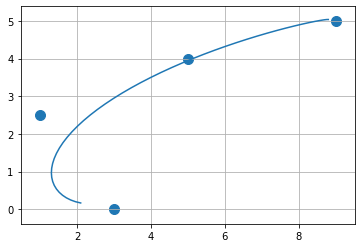

In [14]:
plt.plot(xc.T,yc.T)
plt.scatter(points1,points2,s=100)
plt.grid()
plt.show()